# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 573
['puerto natales', 'port-aux-francais', 'greymouth', 'noyabrsk', 'grytviken', 'haiku-pauwela', 'isafjordur', 'masterton', 'mejit', 'adamstown', 'fale old settlement', 'hihifo', 'talnakh', 'nabire', 'happy valley-goose bay', 'blackmans bay', 'antsiranana', 'tidjikja', 'mecca', 'ushuaia', 'walvis bay', 'invercargill', 'chos malal', 'alice springs', 'hawaiian paradise park', 'ilulissat', 'kulia village', 'yafran', 'itambe', 'saint-pierre', 'constantia', 'iqaluit', 'ghadamis', 'atafu village', 'chittagong', 'diamantino', 'hermanus', 'sitka', 'xinzhi', 'whitehorse', 'yellowknife', 'anantnag', 'fortuna', 'nashville', 'lumphat', 'albany', 'gao', 'boguchar', 'kodiak', 'thompson', 'kavalerovo', 'papatowai', 'cabo san lucas', 'korla', 'klyuchi', 'waitangi', "saksaul'skiy", 'cockburn town', 'port alfred', 'mount pearl', 'karratha', 'impfondo', 'novodvinsk', 'carnarvon', 'pangody', 'edinburgh of the seven seas', 'stanley', 'colesberg', 'lagoa', 'college', 'olonkin

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | greymouth
Processing Record 4 of Set 1 | noyabrsk
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | haiku-pauwela
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | masterton
Processing Record 9 of Set 1 | mejit
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | hihifo
City not found. Skipping...
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | happy valley-goose bay
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | antsiranana
Processing Record 18 of Set 1 | tidjikja
Processing Record 19 of Set 1 | mecca
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | walvis bay
Processing 

Processing Record 40 of Set 4 | kodinsk
Processing Record 41 of Set 4 | mbarara
Processing Record 42 of Set 4 | siwa oasis
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | kayangel
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | deschutes river woods
Processing Record 47 of Set 4 | balakhta
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | faya-largeau
Processing Record 0 of Set 5 | igarka
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | iskateley
Processing Record 4 of Set 5 | weno
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | recife
Processing Record 7 of Set 5 | preobrazheniye
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | san antonio de pale
Processing Record 10 of Set 5 | sintra
Processing Record 11 of Set 5 | hayma'
City not found. Skipping...
Processing Record 12 of Set 5 | quesnel
Processing Record 13 of 

Processing Record 33 of Set 8 | xinyuan
Processing Record 34 of Set 8 | kas
Processing Record 35 of Set 8 | yanchep
Processing Record 36 of Set 8 | concepcion
Processing Record 37 of Set 8 | sumbuya
Processing Record 38 of Set 8 | jumla
Processing Record 39 of Set 8 | crane
Processing Record 40 of Set 8 | union city
Processing Record 41 of Set 8 | susuman
Processing Record 42 of Set 8 | smarhon
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | ostersund
Processing Record 45 of Set 8 | mariental
Processing Record 46 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 47 of Set 8 | ulsteinvik
Processing Record 48 of Set 8 | nogliki
Processing Record 49 of Set 8 | kudahuvadhoo
Processing Record 0 of Set 9 | wenchang
Processing Record 1 of Set 9 | tommot
Processing Record 2 of Set 9 | price
Processing Record 3 of Set 9 | emerald
Processing Record 4 of Set 9 | mananjary
Processing Record 5 of Set 9 | alice
Processing Record 6 of Set 9 | longboa

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,0.48,85,61,2.50,CL,1684717633
1,port-aux-francais,-49.3500,70.2167,6.57,90,100,12.18,TF,1684718048
2,greymouth,-42.4667,171.2000,12.70,70,100,2.06,NZ,1684718049
3,noyabrsk,63.1994,75.4507,5.01,66,1,3.28,RU,1684718049
4,grytviken,-54.2811,-36.5092,0.92,62,100,1.97,GS,1684718049


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.48,85,61,2.50,CL,1684717633
1,port-aux-francais,-49.3500,70.2167,6.57,90,100,12.18,TF,1684718048
2,greymouth,-42.4667,171.2000,12.70,70,100,2.06,NZ,1684718049
3,noyabrsk,63.1994,75.4507,5.01,66,1,3.28,RU,1684718049
4,grytviken,-54.2811,-36.5092,0.92,62,100,1.97,GS,1684718049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

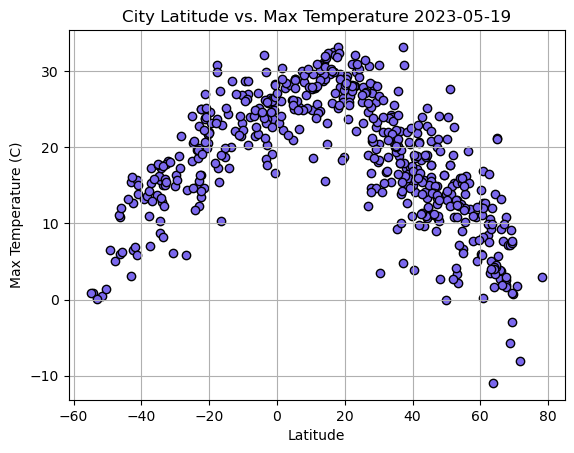

In [45]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

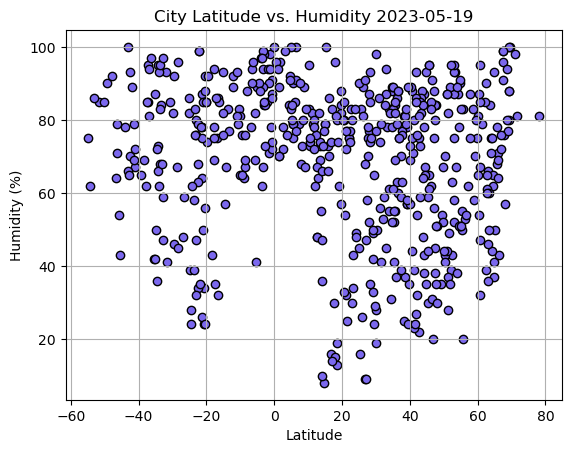

In [46]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

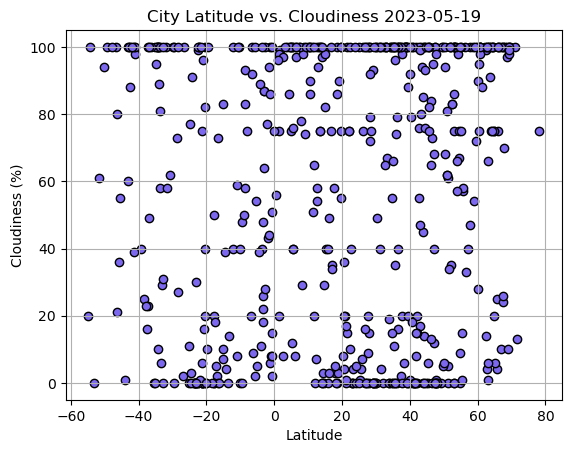

In [47]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

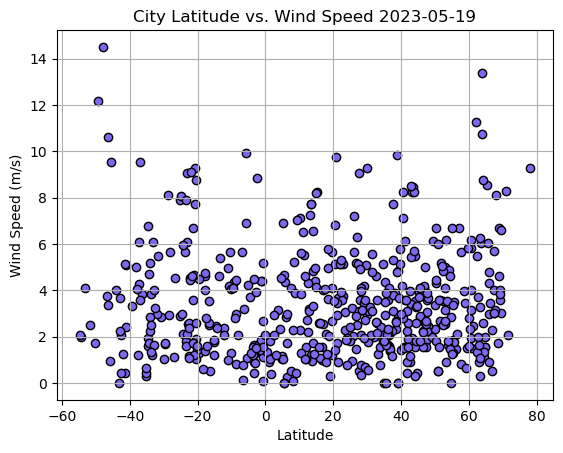

In [48]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots

# Define model
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create regression line and add to plot
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

# Calculate and plot Pearson's r value
    print(f"The r-value is: {rvalue}")
    
# Remaining graphical elements for all plots
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
    return line_eq, rvalue

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,noyabrsk,63.1994,75.4507,5.01,66,1,3.28,RU,1684718049
5,haiku-pauwela,20.9219,-156.3051,28.01,54,20,9.77,US,1684718049
6,isafjordur,66.0755,-23.1240,3.70,71,75,4.81,IS,1684717386
8,mejit,10.2753,170.8646,27.68,83,100,7.12,MH,1684717930
11,talnakh,69.4865,88.3972,0.67,100,100,3.00,RU,1684718050


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()
lat_all_north = southern_hemi_df["Lat"]
temp_all_north = southern_hemi_df["Max Temp"]
humid_all_north = northern_hemi_df["Humidity"]
cloud_all_north = northern_hemi_df["Cloudiness"]
wind_all_north = northern_hemi_df["Wind Speed"]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.48,85,61,2.50,CL,1684717633
1,port-aux-francais,-49.3500,70.2167,6.57,90,100,12.18,TF,1684718048
2,greymouth,-42.4667,171.2000,12.70,70,100,2.06,NZ,1684718049
4,grytviken,-54.2811,-36.5092,0.92,62,100,1.97,GS,1684718049
7,masterton,-40.9597,175.6575,13.82,67,98,2.41,NZ,1684718049


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.817971707352714


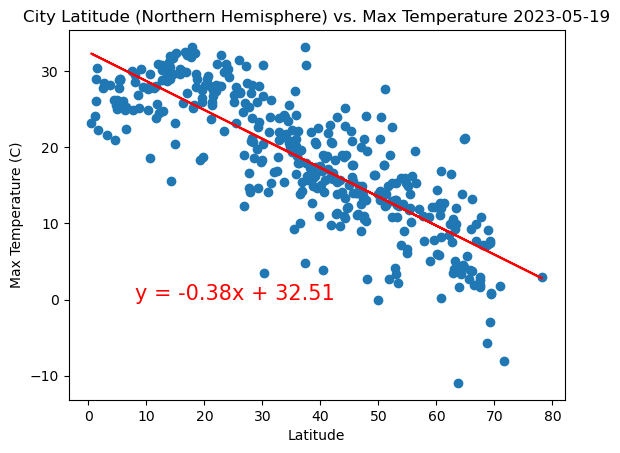

In [52]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regEQplotX = 8
regEQplotY = 0

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (8, 0), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.811182653663506


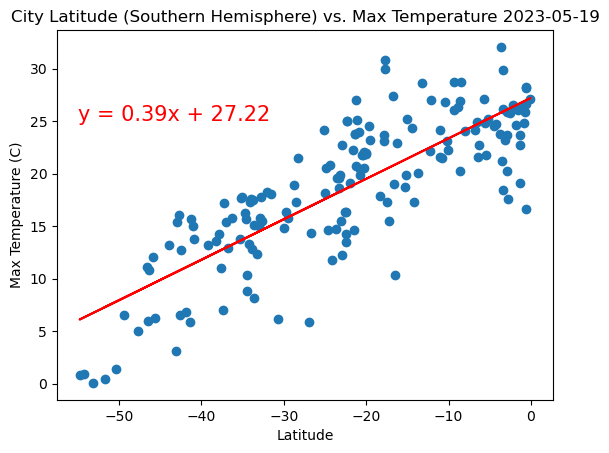

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regEQplotX = -55
regEQplotY = 25

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 

It should be stated at the outset that the generalizability of the findings across all plots is limited because the plots represent a single day, 5/19/2023. Since the weather fluctuates in any locale, this day may exhibit atypical meteorological patterns in many places and thus not convey more enduring weather features. Analyzing data over time would address this small-n problem.

Moreover, relying on the citipy dataset overrepresents regions that have more major cities and correspondingly underrepresents those with fewer large cities or fewer cities in general. The longitude and latitude range covers the entire earth, but there is an urban bias that might be partially mitigated by weighting regions by the number and size of their cities. 

As for the latitude vs. temperature plots: There is a noticeable downward slope of the regression line for the northern hemisphere and an upward slope for the southern hemisphere, displaying a negative relationship between latitude and temperature for the former and a positive relationship for the latter. R values are extreme (-0.82 for the northern hemisphere, 0.81 for the southern hemisphere), showing that these relationships hold for the majority of the data. As mentioned in the introduction to this assignment, this makes sense because higher latitudes in the northern hemisphere are closer to the North Pole, where it is cold, while higher latitudes in the southern hemisphere are closer to the equator, where it tends to be warm.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.035515962367669615


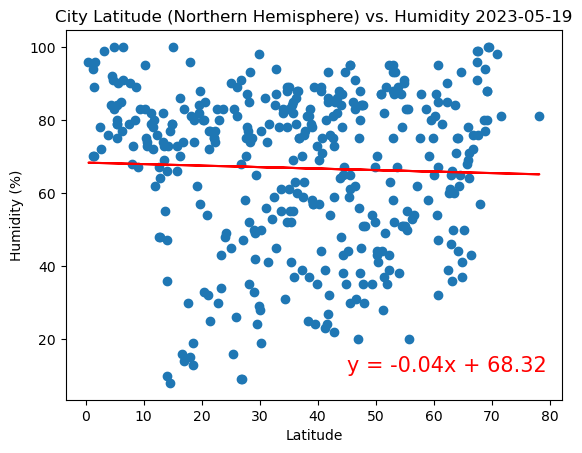

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 11

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Northern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (45, 11), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig7.png")

# Show the plot
plt.show()

The r-value is: 0.16291419230124266


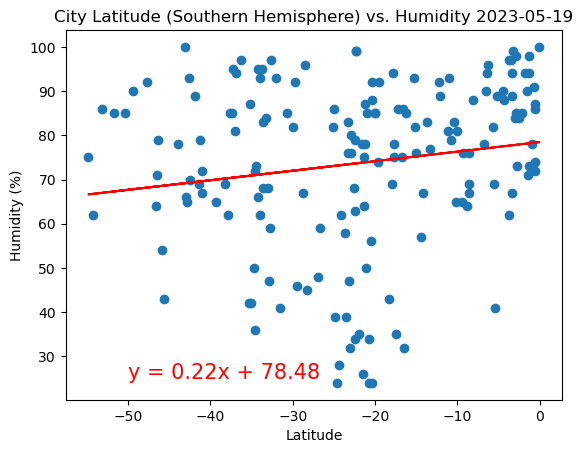

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regEQplotX = -50
regEQplotY = 25

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:**

The line of best fit for latitude vs. humidity is horizontal for the northern hemisphere, with a slope and r score that are just a bit negative. The southern hemisphere's linear relationship is slightly positive, but with a Pearson's r of 0.16; greater in volume than for the northern hemisphere, but still modest. On balance, there is no significant relationship between latitude and humidity, particularly in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.062477817083062735


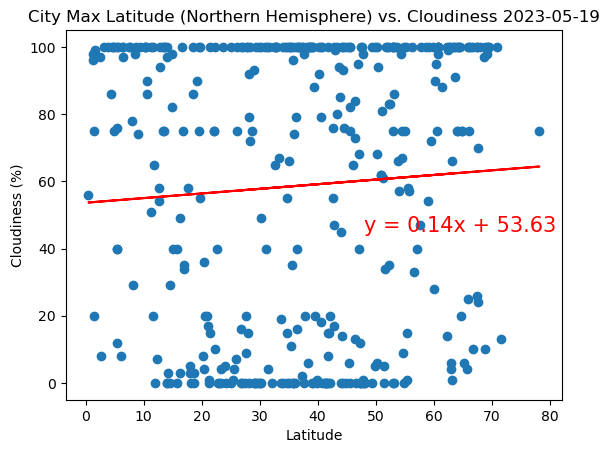

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regEQplotX = 48
regEQplotY = 45

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (48, 45), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: -0.16522082966994747


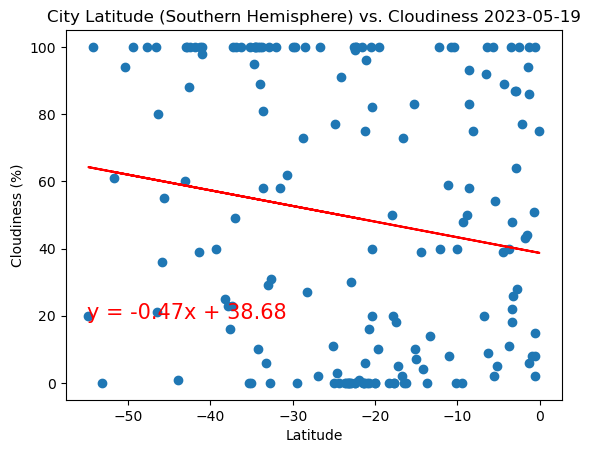

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regEQplotX = -55
regEQplotY = 19

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 19), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

# **Discussion about the linear relationship:** 

The regression line for latitude vs. cloudiness, the latter expressed as a percentage, slopes very slightly upward for the northern hemisphere and downward to a greater degree for the southern hemisphere. The Pearson's r value is -0.17 at a low absolute volume for both plots, with -0.21 for the southern hemisphere and practically zero for the northern, which makes sense given the noticeably widely different values of the datapoints shown in the plots. A future study might look at the relationship between humidity and cloudiness, given that clouds are composed of water vapor and both variables seem to be unrelated to an increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12458087937412445


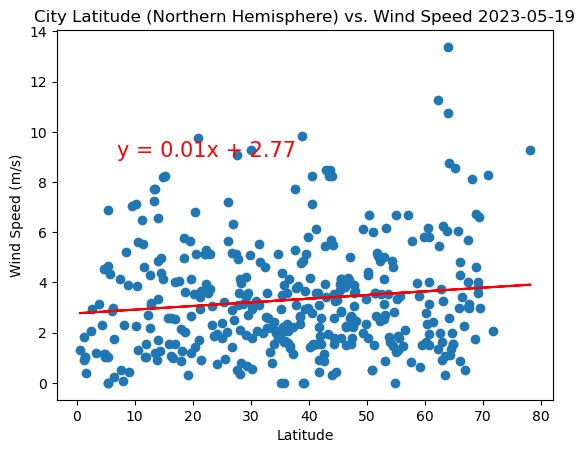

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regEQplotX = 7
regEQplotY = 9

# Label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (7, 9), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: -0.17883583355266702


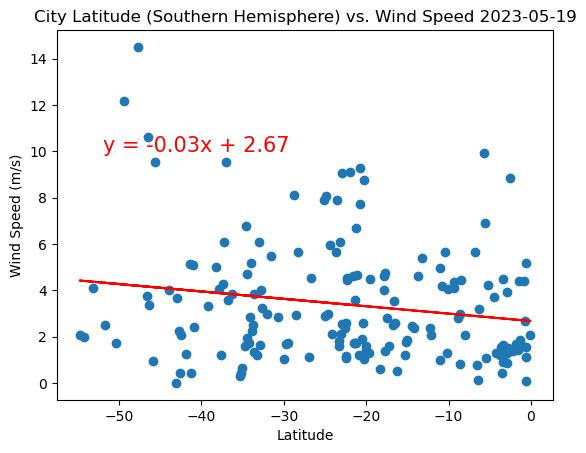

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-52, 10), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig10.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

As with cloudiness, wind speed (m/s) almosy holds steady with increasing latitude in the northern hemisphere, with a barely positive line of best fit and a low (0.12) r score, while the southern hemisphere displays a mildly negative relationship with a higher, though still modest Pearson's r of -0.18.

On balance, temperature is strongly correlated with changes in latitude and each hemisphere has its distinct pattern in this regard. The other variables in this study are practically unrelated to an increase in latitude, with the northern hemisphere in particular showing a particular lack of volatility.